In [1]:
%load_ext autoreload
%autoreload 2

import sys
import importlib

sys.path.append("/Users/liangxuntan/Code/fyp2025/scripts")

import mlfunctions3 as mlf
# importlib.reload(mlf)

In [2]:
media_df = mlf.read_csv(
    "/Users/liangxuntan/Code/fyp2025/data/modelbuildingdata/media_df_gL.csv"
)
media_df.head()

,Peptone,Meat extract,Agar,Distilled water,Distilled water.1,Glucose,Mannitol,CaCl2 x 2 H2O,MgSO4 x 7 H2O,Na2MoO4 x 2 H2O,...,Tryptose-phosphate broth,Dichloran-Glycerol-agar base,Glycerol (anhydrous),Air,α-D-Glucose monohydrate,"2,4-Dihydroxybenzoic acid","3,5-Dihydroxybenzoic acid",Ferric citrate monohydrate,(-)-Quinic acid,MES Hydrat
1,5.0,3.0,15.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,3.0,15.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,15.0,0.0,0.0,5.0,5.0,0.10,0.1,0.005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.05,0.5,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,15.0,0.0,0.0,1.0,0.0,0.00,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
pfam_df = mlf.read_csv(
    "/Users/liangxuntan/Code/fyp2025/data/modelbuildingdata/pfam_df_full.csv"
)
pfam_df.head()

,tRNA synthetases class I (M),VanW like protein,Glucose inhibited division protein A,tRNA modifying enzyme MnmG/GidA C-terminal helical domain,"Acyl-CoA dehydrogenase, C-terminal domain","Acyl-CoA dehydrogenase, N-terminal domain","Acyl-CoA dehydrogenase, middle domain",Electron transfer flavoprotein domain,Electron transfer flavoprotein FAD-binding domain,Peptide methionine sulfoxide reductase,...,ORF11CD3 domain,Protein of unknown function (DUF2732),Acid shock protein,T6SS Tli3 immunity protein,Uncharacterized conserved protein (DUF2290),Ash protein family,Protein of unknown function (DUF1493),Family of unknown function (DUF7665),LytR cell envelope-related transcriptional attenuator,Chloroplast envelope transporter
872,5,2,2,1,8,8,8,6,3,1,...,0,0,0,0,0,0,0,0,0,0
1426,3,0,2,0,4,4,4,2,1,3,...,0,0,0,0,0,0,0,0,0,0
1684,4,0,2,1,3,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
1328,4,0,1,0,0,0,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
340,1,0,1,0,1,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
pfam_df_bin = (pfam_df > 0).astype(int)
media_df_bin = (media_df > 0).astype(int)

In [12]:
media_df_sorted,pfam_df_sorted = mlf.check_and_align_indices(
    media_df_bin, pfam_df_bin)

  912 indices in df1 not in df2: [3, 8, 10, 12, 13] ...
  4 indices in df2 not in df1: [1854, 77, 1790, 1759] ...
  Keeping only 702 shared indices.


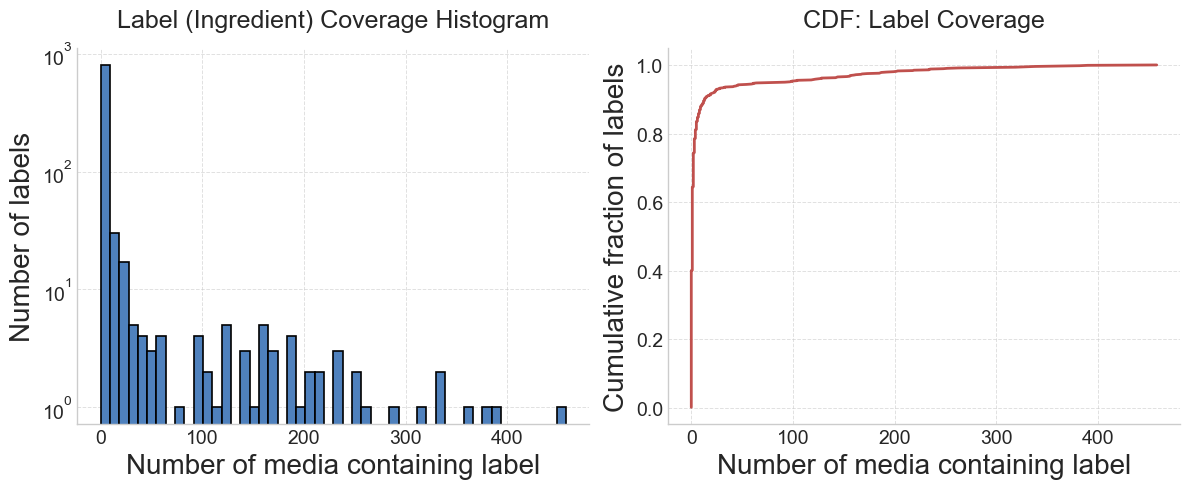

=== Label (Ingredient) Coverage Summary ===
Total labels: 915
Total samples: 702
Mean label presence: 13.03
Median label presence: 1.0
Min/Max label presence: 0 / 458
Labels present in only one sample: 223
Labels present in ALL samples: 0
10% of labels present in ≤ 0 samples
25% of labels present in ≤ 0 samples
50% of labels present in ≤ 1 samples
75% of labels present in ≤ 3 samples
90% of labels present in ≤ 13 samples


In [14]:
mlf.summarize_label_distribution_pub(media_df_sorted)

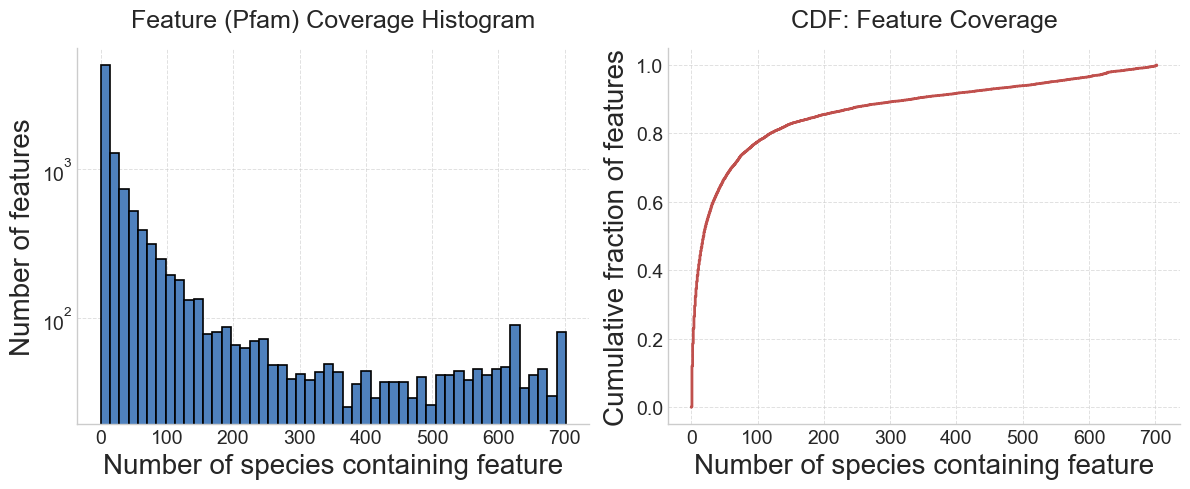

=== Feature (Pfam) Coverage Summary ===
Total features: 11075
Total samples: 702
Mean feature presence: 91.69
Median feature presence: 19.0
Min/Max feature presence: 0 / 702
Features present in only one sample: 1319
Features present in ALL samples: 22
10% of features present in ≤ 1 samples
25% of features present in ≤ 4 samples
50% of features present in ≤ 19 samples
75% of features present in ≤ 84 samples
90% of features present in ≤ 332 samples


In [15]:
mlf.summarize_feature_distribution_pub(pfam_df_sorted)

=== Label Distribution Report ===
Total labels (columns): 915
Total samples (rows): 702

Labels with the most positives (top 10):
Yeast extract      458
NaCl               390
CaCl2 x 2 H2O      382
MgSO4 x 7 H2O      362
Na2MoO4 x 2 H2O    338
H3BO3              330
KH2PO4             319
NiCl2 x 6 H2O      292
NH4Cl              263
CoCl2 x 6 H2O      252
dtype: int64

Fraction of samples positive for each of top 10 labels:
Yeast extract      0.652
NaCl               0.556
CaCl2 x 2 H2O      0.544
MgSO4 x 7 H2O      0.516
Na2MoO4 x 2 H2O    0.481
H3BO3              0.470
KH2PO4             0.454
NiCl2 x 6 H2O      0.416
NH4Cl              0.375
CoCl2 x 6 H2O      0.359
dtype: object

Number of labels with zero positives: 366
Number of labels with only one positive: 223
Number of labels present in more than 10% of samples: 48

=== Label Distribution (Full, sorted) ===
Yeast extract              458
NaCl                       390
CaCl2 x 2 H2O              382
MgSO4 x 7 H2O            

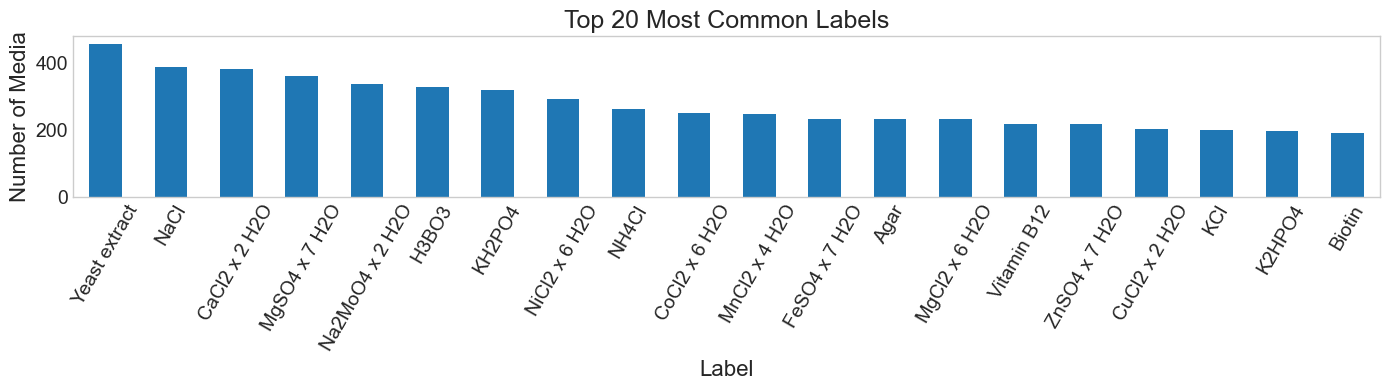

In [23]:
mlf.report_label_distribution(media_df_sorted)

=== Feature Distribution Report ===
Total features (columns): 11075
Total samples (rows): 706

Features present in the most samples (top 10):
ABC transporter                                                        42087
Response regulator receiver domain                                     22133
Major Facilitator Superfamily                                          15215
Histidine kinase-, DNA gyrase B-, and HSP90-like ATPase                14083
short chain dehydrogenase                                              13983
Enoyl-(Acyl carrier protein) reductase                                 13908
Binding-protein-dependent transport system inner membrane component     9890
Diguanylate cyclase, GGDEF domain                                       8913
LysR substrate binding domain                                           8632
Pyridine nucleotide-disulphide oxidoreductase                           7578
dtype: int64

Fraction of samples positive for each of top 10 features:
ABC transporter 

/Users/liangxuntan/Code/fyp2025/scripts/mlfunctions3.py:560: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


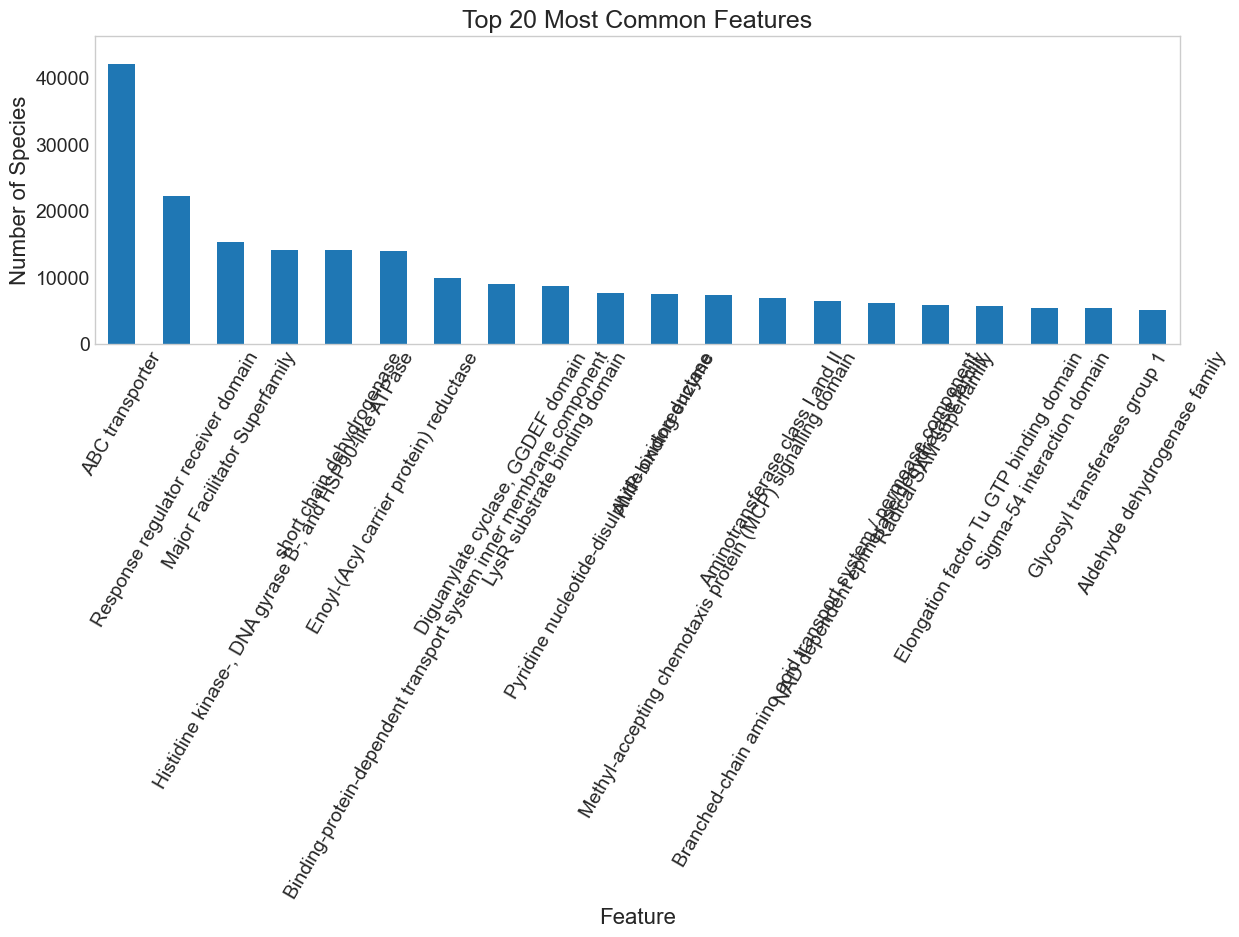

In [21]:
mlf.report_feature_distribution(pfam_df)

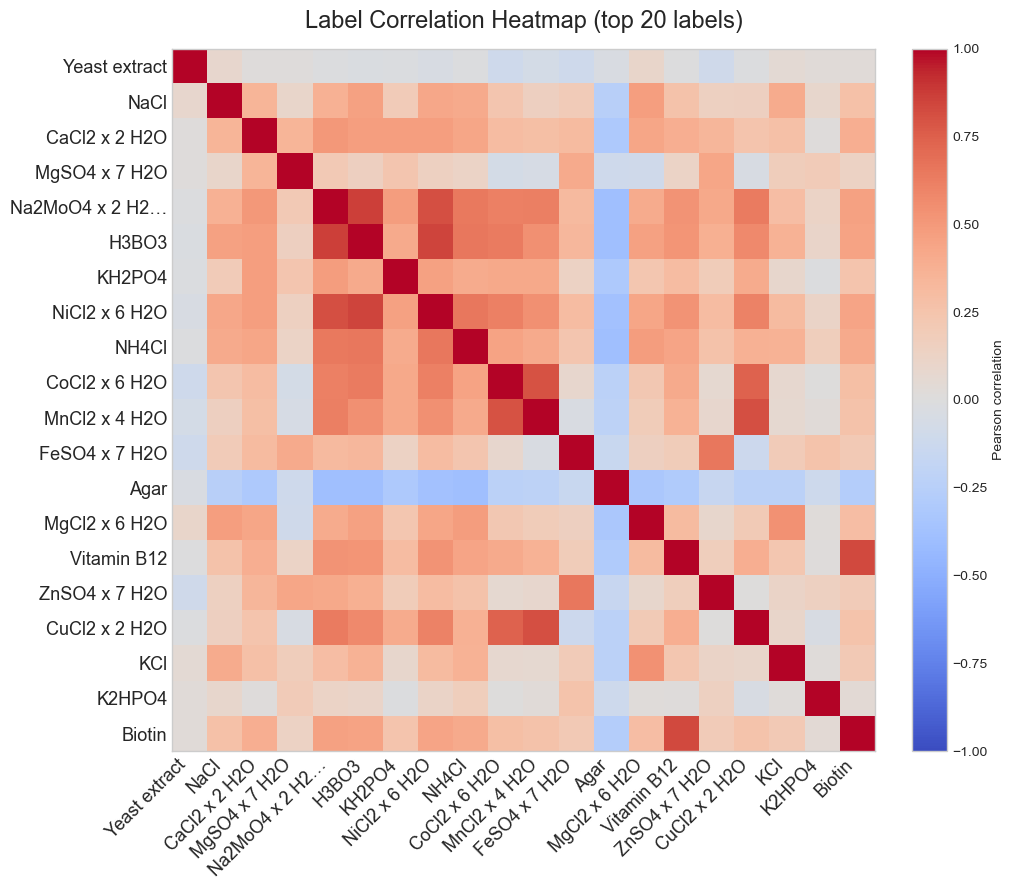

In [28]:
corr = mlf.plot_label_correlation_heatmap(
    media_df_sorted,        
    top_n=20,
    method='pearson',
    figsize=(11, 9),
)

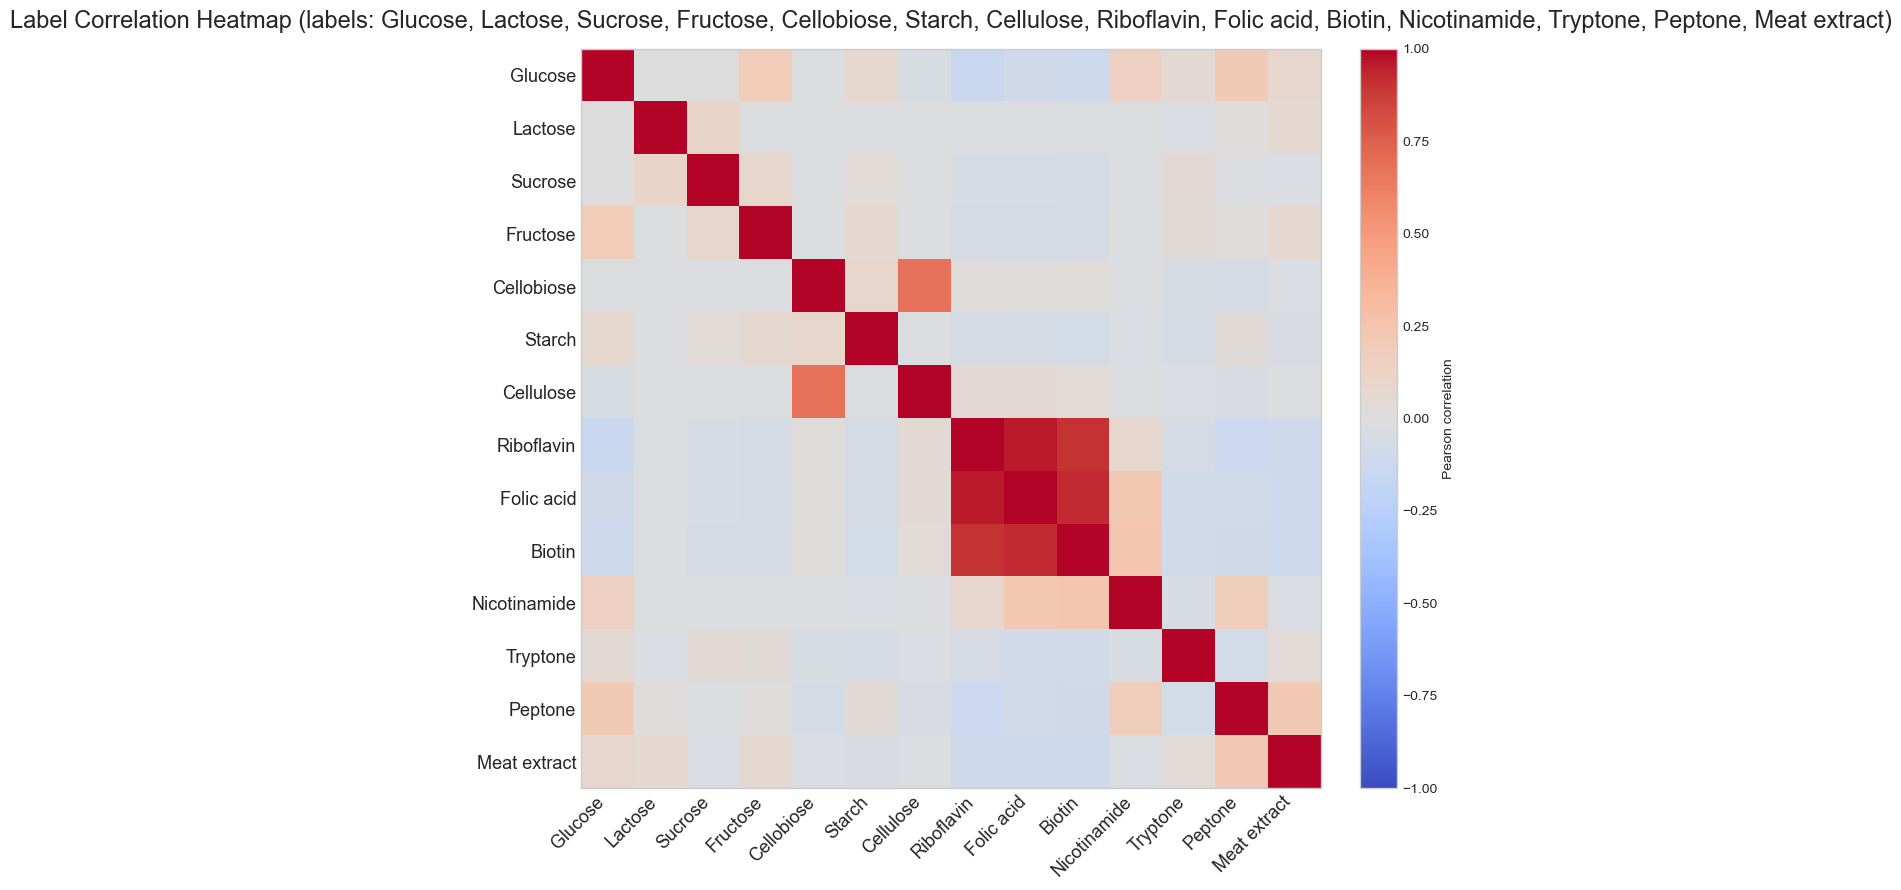

,Glucose,Lactose,Sucrose,Fructose,Cellobiose,Starch,Cellulose,Riboflavin,Folic acid,Biotin,Nicotinamide,Tryptone,Peptone,Meat extract
Glucose,1.000000,-0.000354,-0.005233,0.184926,-0.013734,0.077597,-0.045112,-0.136060,-0.097942,-0.113433,0.144324,0.041787,0.197948,0.083138
Lactose,-0.000354,1.000000,0.102029,-0.009318,-0.013719,-0.016304,-0.009318,-0.015809,-0.017187,-0.022253,-0.013719,-0.026803,0.009798,0.067691
Sucrose,-0.005233,0.102029,1.000000,0.092559,-0.020297,0.037905,-0.013785,-0.052281,-0.054033,-0.060577,-0.020297,0.039653,-0.022034,-0.025844
Fructose,0.184926,-0.009318,0.092559,1.000000,-0.014829,0.066538,-0.010072,-0.056291,-0.057392,-0.061578,-0.014829,0.024832,0.003510,0.060018
Cellobiose,-0.013734,-0.013719,-0.020297,-0.014829,1.000000,0.089706,0.679187,0.009472,0.006936,0.019833,-0.021834,-0.042656,-0.057385,-0.027801
Starch,0.077597,-0.016304,0.037905,0.066538,0.089706,1.000000,-0.017624,-0.059299,-0.061614,-0.070227,-0.025948,-0.050693,0.030922,-0.033039
Cellulose,-0.045112,-0.009318,-0.013785,-0.010072,0.679187,-0.017624,1.000000,0.044516,0.042416,0.034912,-0.014829,-0.028971,-0.038975,-0.018882
Riboflavin,-0.136060,-0.015809,-0.052281,-0.056291,0.009472,-0.059299,0.044516,1.000000,0.957576,0.899172,0.078736,-0.061683,-0.118892,-0.105530
Folic acid,-0.097942,-0.017187,-0.054033,-0.057392,0.006936,-0.061614,0.042416,0.957576,1.000000,0.924614,0.212669,-0.078248,-0.084950,-0.107593
Biotin,-0.113433,-0.022253,-0.060577,-0.061578,0.019833,-0.070227,0.034912,0.899172,0.924614,1.000000,0.240825,-0.081181,-0.096236,-0.115440


In [32]:
mlf.plot_label_correlation_heatmap(
    media_df_sorted,
    labels=['Glucose','Lactose','Sucrose','Fructose' ,'Cellobiose','Starch','Cellulose',
             'Riboflavin','Folic acid','Biotin','Nicotinamide','Tryptone',
            'Peptone','Meat extract'],
    method='pearson',
    figsize=(11, 9),
)

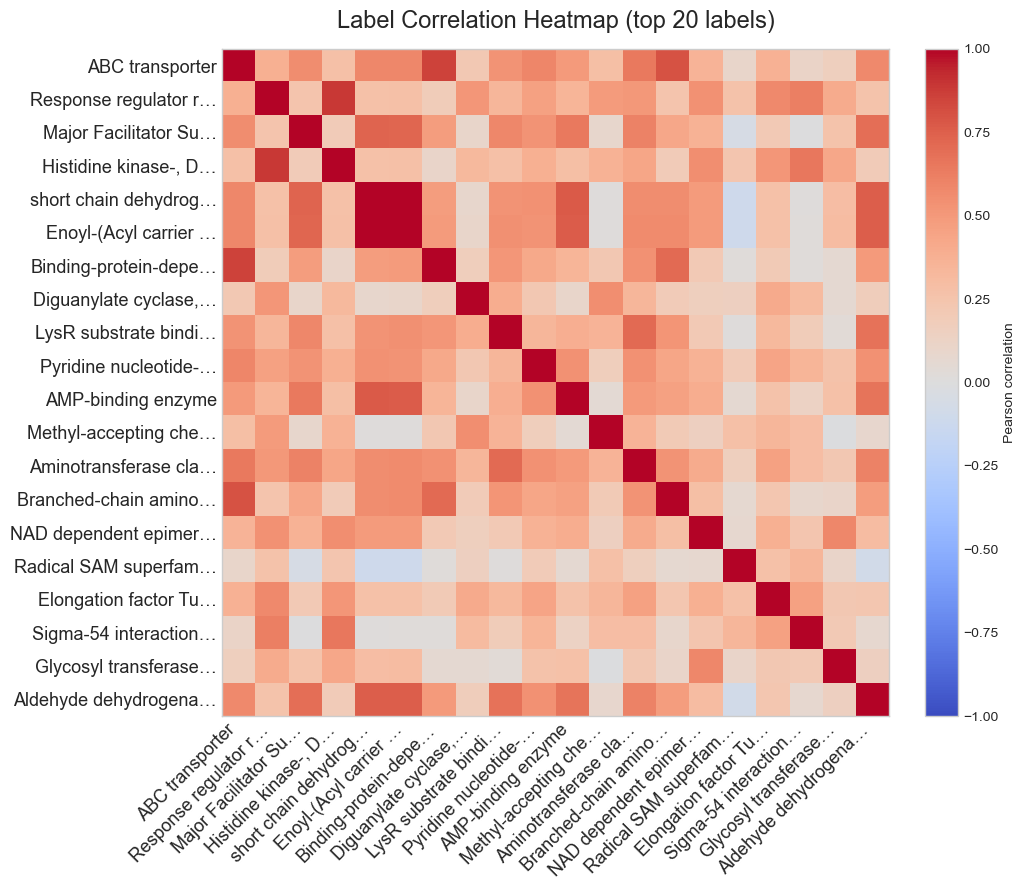

In [37]:
corr = mlf.plot_label_correlation_heatmap(
    pfam_df,
    top_n=20,
    method='pearson',
    figsize=(11, 9),
    label_truncate=20
)

Number of unique groups: 39
Running t-SNE on 1362 samples with perplexity=12...


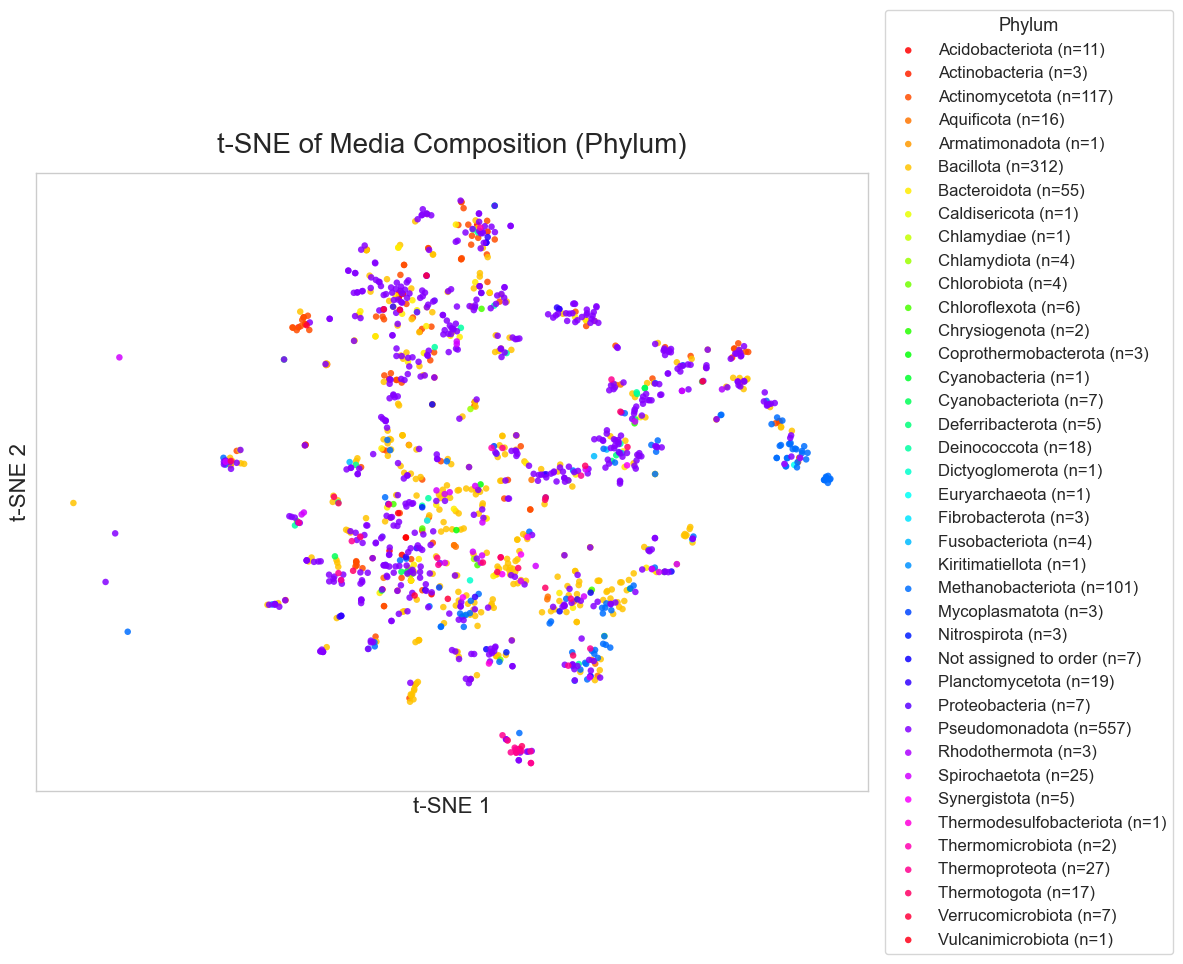

(array([[ -2.284495 ,  46.0566   ],
        [ -3.5932703,  45.52023  ],
        [-21.072845 ,  30.319971 ],
        ...,
        [-14.564361 , -30.727158 ],
        [ -7.251087 ,  57.56087  ],
        [ 34.651    ,  16.36212  ]], dtype=float32),
 array(['Bacillota', 'Bacillota', 'Pseudomonadota', ...,
        'Not assigned to order', 'Pseudomonadota', 'Pseudomonadota'],
       dtype=object))

In [44]:
mlf.plot_tsne_by_group(
    media_df,
    sample_to_group=mlf.read_json(
        "/Users/liangxuntan/Code/fyp2025/data/modelbuildingdata/num2phylum.json"),
    title='t-SNE of Media Composition (Phylum)',
    group_label='Phylum',
    perplexity=12)

Filtered out 0 columns.
  - 0 columns had < 0 non-zero samples.
Remaining columns: 915
Filtered out 0 columns.
  - 0 columns had < 0 non-zero samples.
Remaining columns: 11075


/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Filtered out 589 columns.
  - 589 columns had < 2 non-zero samples.
Remaining columns: 326
Filtered out 1335 columns.
  - 1335 columns had < 2 non-zero samples.
Remaining columns: 9740


/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Filtered out 742 columns.
  - 742 columns had < 5 non-zero samples.
Remaining columns: 173
Filtered out 2943 columns.
  - 2943 columns had < 5 non-zero samples.
Remaining columns: 8132


/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Filtered out 804 columns.
  - 804 columns had < 10 non-zero samples.
Remaining columns: 111
Filtered out 4269 columns.
  - 4269 columns had < 10 non-zero samples.
Remaining columns: 6806


/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Filtered out 838 columns.
  - 838 columns had < 20 non-zero samples.
Remaining columns: 77
Filtered out 5666 columns.
  - 5666 columns had < 20 non-zero samples.
Remaining columns: 5409


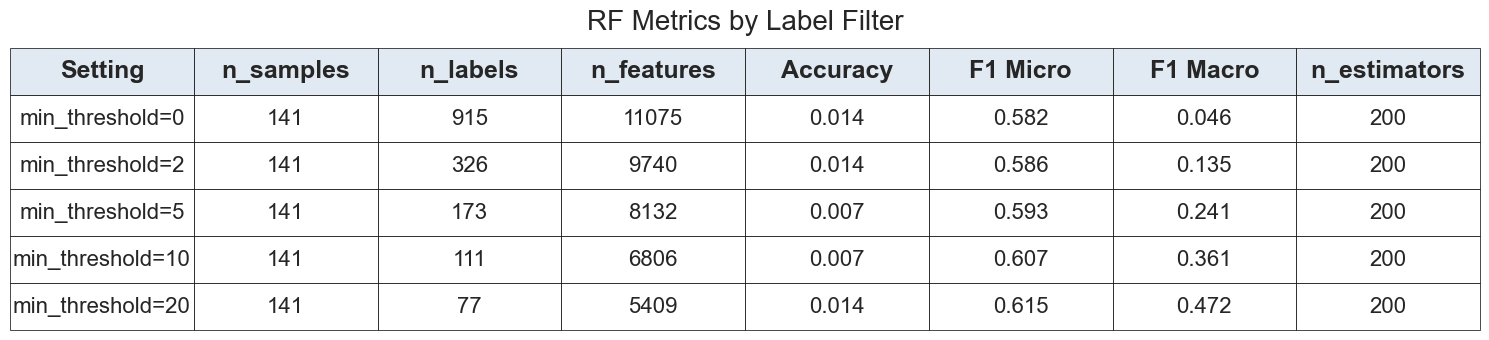

,Setting,n_samples,n_labels,n_features,Accuracy,F1 Micro,F1 Macro,n_estimators
0,min_threshold=0,141,915,11075,0.014,0.582,0.046,200
1,min_threshold=2,141,326,9740,0.014,0.586,0.135,200
2,min_threshold=5,141,173,8132,0.007,0.593,0.241,200
3,min_threshold=10,141,111,6806,0.007,0.607,0.361,200
4,min_threshold=20,141,77,5409,0.014,0.615,0.472,200


In [47]:
results = []

pfam_df_sorted.index = pfam_df_sorted.index.map(str)
media_df_sorted.index = media_df_sorted.index.map(str)

for min_count in [0, 2, 5, 10, 20]:
    # Filter labels by min_count (example)
    mdf1 = mlf.filter_columns_by_count(media_df_sorted, min_count)
    pdf1 = mlf.filter_columns_by_count(pfam_df_sorted, min_count)
    # Train/test split and model
    pdf1, mdf1 = mlf.check_and_align_indices(pdf1, mdf1, drop_diff=True)
    clf, X_test, y_test, y_pred = mlf.run_rf_multilabel_classification(
        pdf1, mdf1, verbose=False
    )
    # Collect metrics for this run
    d = mlf.collect_metrics_dict(
        setting=f"min_threshold={min_count}",
        y_true=y_test,
        y_pred=y_pred,
        xtest=X_test,
        n_estimators=200
    )
    results.append(d)

# Now report table:
mlf.report_metrics_table(results, title="RF Metrics by Label Filter")

In [48]:
media_df_filtered = mlf.filter_columns_by_count(media_df_sorted, 5)
pfam_df_filtered = mlf.filter_columns_by_count(pfam_df_sorted, 5)

Filtered out 742 columns.
  - 742 columns had < 5 non-zero samples.
Remaining columns: 173
Filtered out 2943 columns.
  - 2943 columns had < 5 non-zero samples.
Remaining columns: 8132


In [49]:
cv_results = mlf.run_rf_multilabel_classification(
    pfam_df_filtered, media_df_filtered, cv=5, verbose=True
)

/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Fold 1 ===
Accuracy: 0.014
F1 Micro: 0.596
F1 Macro: 0.246


/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Fold 2 ===
Accuracy: 0.014
F1 Micro: 0.575
F1 Macro: 0.249


/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Fold 3 ===
Accuracy: 0.007
F1 Micro: 0.593
F1 Macro: 0.233


/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Fold 4 ===
Accuracy: 0.000
F1 Micro: 0.574
F1 Macro: 0.242

=== Fold 5 ===
Accuracy: 0.000
F1 Micro: 0.553
F1 Macro: 0.206

=== Cross-Validation Results ===
Mean Accuracy: 0.0070 ± 0.0063
Mean F1 Micro: 0.5782 ± 0.0155
Mean F1 Macro: 0.2352 ± 0.0156


/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


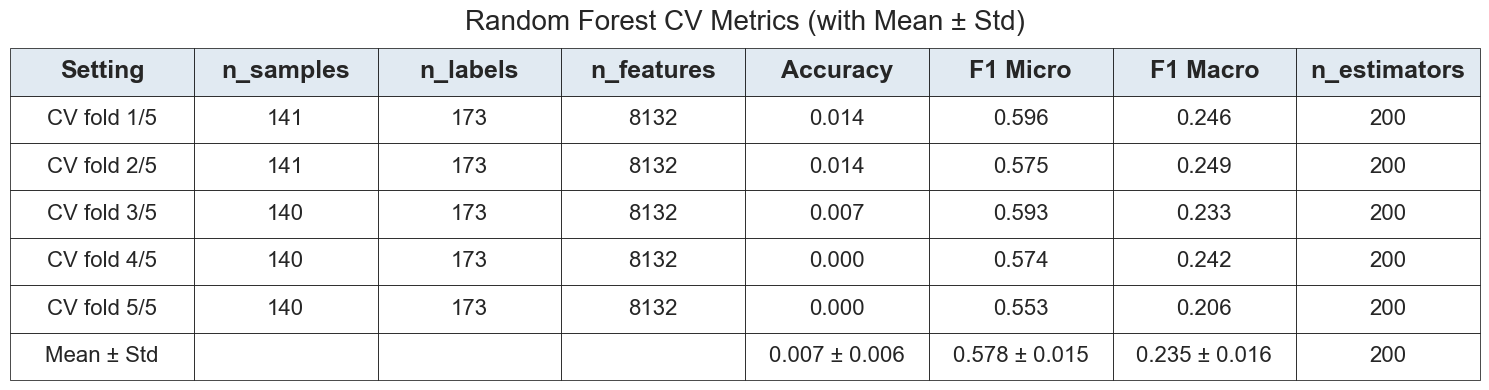

,Setting,n_samples,n_labels,n_features,Accuracy,F1 Micro,F1 Macro,n_estimators
0,CV fold 1/5,141,173,8132,0.014,0.596,0.246,200
1,CV fold 2/5,141,173,8132,0.014,0.575,0.249,200
2,CV fold 3/5,140,173,8132,0.007,0.593,0.233,200
3,CV fold 4/5,140,173,8132,0.000,0.574,0.242,200
4,CV fold 5/5,140,173,8132,0.000,0.553,0.206,200
5,Mean ± Std,,,,0.007 ± 0.006,0.578 ± 0.015,0.235 ± 0.016,200


In [50]:
import numpy as np

accs = [float(d['Accuracy']) for d in cv_results['fold_metrics']]
f1mics = [float(d['F1 Micro']) for d in cv_results['fold_metrics']]
f1macs = [float(d['F1 Macro']) for d in cv_results['fold_metrics']]

summary = {
    "Setting": "Mean ± Std",
    "n_samples": "",  # can also show mean n_samples per fold if you want
    "n_labels": "",
    "n_features": "",
    "Accuracy": f"{np.mean(accs):.3f} ± {np.std(accs):.3f}",
    "F1 Micro": f"{np.mean(f1mics):.3f} ± {np.std(f1mics):.3f}",
    "F1 Macro": f"{np.mean(f1macs):.3f} ± {np.std(f1macs):.3f}",
    "n_estimators": cv_results['fold_metrics'][0]['n_estimators']
}
rows = cv_results['fold_metrics'] + [summary]
mlf.report_metrics_table(
    rows,
    title="Random Forest CV Metrics (with Mean ± Std)"
)

In [51]:
best_model, X_test, y_test, y_pred, results = mlf.tune_rf_multilabel(
    pfam_df_filtered, media_df_filtered, n_iter=10
)


>> Performing RandomizedSearchCV with 10 iterations...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END estimator__class_weight=balanced_subsample, estimator__max_depth=5, estimator__min_samples_split=2, estimator__n_estimators=100; total time=  58.8s
[CV] END estimator__class_weight=balanced_subsample, estimator__max_depth=20, estimator__min_samples_split=5, estimator__n_estimators=100; total time=  58.8s
[CV] END estimator__class_weight=balanced_subsample, estimator__max_depth=5, estimator__min_samples_split=2, estimator__n_estimators=100; total time=  59.3s
[CV] END estimator__class_weight=balanced_subsample, estimator__max_depth=20, estimator__min_samples_split=5, estimator__n_estimators=100; total time=  59.9s
[CV] END estimator__class_weight=balanced_subsample, estimator__max_depth=20, estimator__min_samples_split=5, estimator__n_estimators=100; total time=  59.9s
[CV] END estimator__class_weight=balanced_subsample, estimator__max_depth=5, estimator__min_samp

/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END estimator__class_weight=balanced_subsample, estimator__max_depth=5, estimator__min_samples_split=2, estimator__n_estimators=500; total time= 3.2min
[CV] END estimator__class_weight=balanced_subsample, estimator__max_depth=5, estimator__min_samples_split=2, estimator__n_estimators=200; total time= 1.6min
[CV] END estimator__class_weight=balanced_subsample, estimator__max_depth=5, estimator__min_samples_split=5, estimator__n_estimators=200; total time= 1.3min
[CV] END estimator__class_weight=balanced_subsample, estimator__max_depth=5, estimator__min_samples_split=5, estimator__n_estimators=200; total time= 1.3min
[CV] END estimator__class_weight=balanced_subsample, estimator__max_depth=5, estimator__min_samples_split=5, estimator__n_estimators=200; total time= 1.3min
[CV] END estimator__class_weight=balanced_subsample, estimator__max_depth=20, estimator__min_samples_split=2, estimator__n_estimators=200; total time= 1.3min
[CV] END estimator__class_weight=balanced_subsample, esti

/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/Users/liangxuntan/Code/fyp2025/scripts/mlfunctions3.py:427: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: wrap(x, min_colwidth))


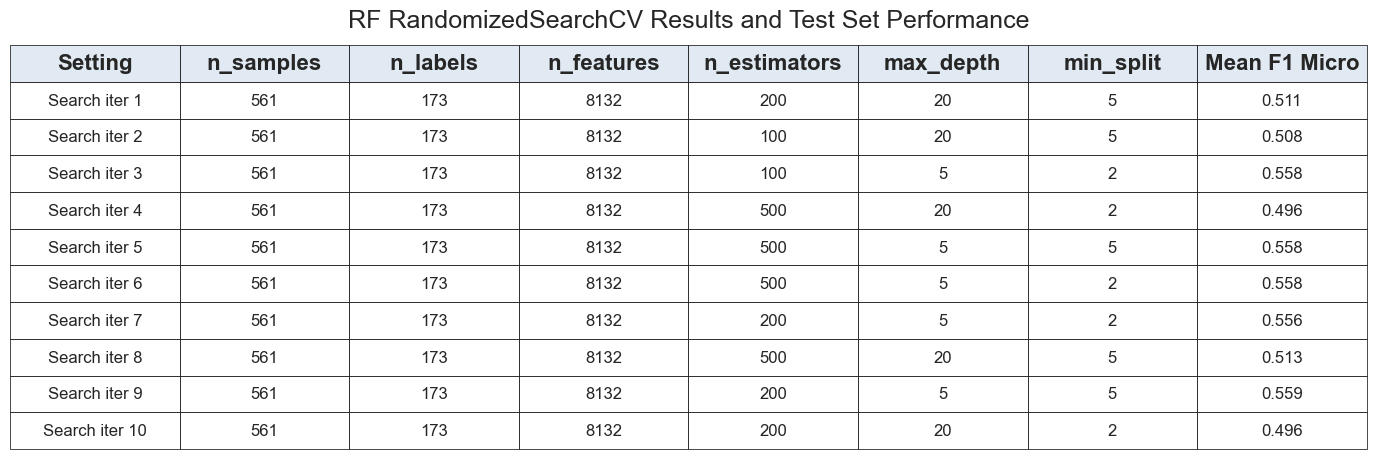

,Setting,n_samples,n_labels,n_features,n_estimators,max_depth,min_split,Mean F1 Micro
0,Search iter 1,561,173,8132,200,20,5,0.511
1,Search iter 2,561,173,8132,100,20,5,0.508
2,Search iter 3,561,173,8132,100,5,2,0.558
3,Search iter 4,561,173,8132,500,20,2,0.496
4,Search iter 5,561,173,8132,500,5,5,0.558
5,Search iter 6,561,173,8132,500,5,2,0.558
6,Search iter 7,561,173,8132,200,5,2,0.556
7,Search iter 8,561,173,8132,500,20,5,0.513
8,Search iter 9,561,173,8132,200,5,5,0.559
9,Search iter 10,561,173,8132,200,20,2,0.496


In [52]:
mlf.report_metrics_table2(
    results,
    title="RF RandomizedSearchCV Results and Test Set Performance",
    fontsize=14,
    min_colwidth=26,
    cell_height=0.36  
)   

In [53]:
clf, X_test, y_test, y_pred = mlf.run_rf_multilabel_classification(pfam_df_filtered, media_df_filtered)

=== Accuracy Score ===
0.0070921985815602835

=== F1 Micro ===
0.5927754094682521

=== F1 Macro ===
0.24113117830532474

=== Classification Report ===
                            precision    recall  f1-score   support

                   Peptone       0.31      0.22      0.26        18
              Meat extract       0.20      0.50      0.29         2
                      Agar       0.61      0.90      0.73        50
                   Glucose       0.60      0.58      0.59        26
                  Mannitol       0.00      0.00      0.00         1
             CaCl2 x 2 H2O       0.76      0.72      0.74        78
             MgSO4 x 7 H2O       0.69      0.56      0.62        79
           Na2MoO4 x 2 H2O       0.81      0.66      0.72        70
                    K2HPO4       0.42      0.33      0.37        40
                    KH2PO4       0.62      0.67      0.65        60
             FeSO4 x 7 H2O       0.62      0.65      0.63        48
                     CaCO3      

/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/liangxuntan/anaconda3/envs/mne/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive sam

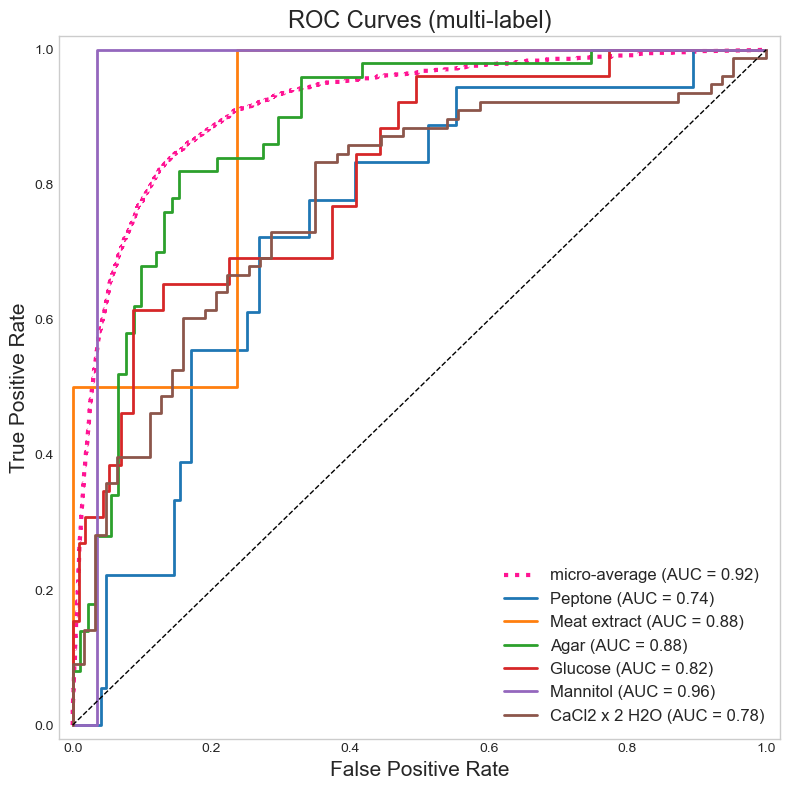

In [54]:
mlf.plot_multilabel_roc_from_clf(
    clf, X_test, y_test,
    label_names=list(y_test.columns),
    max_curves=6,          # plot top 6 ROC curves
)

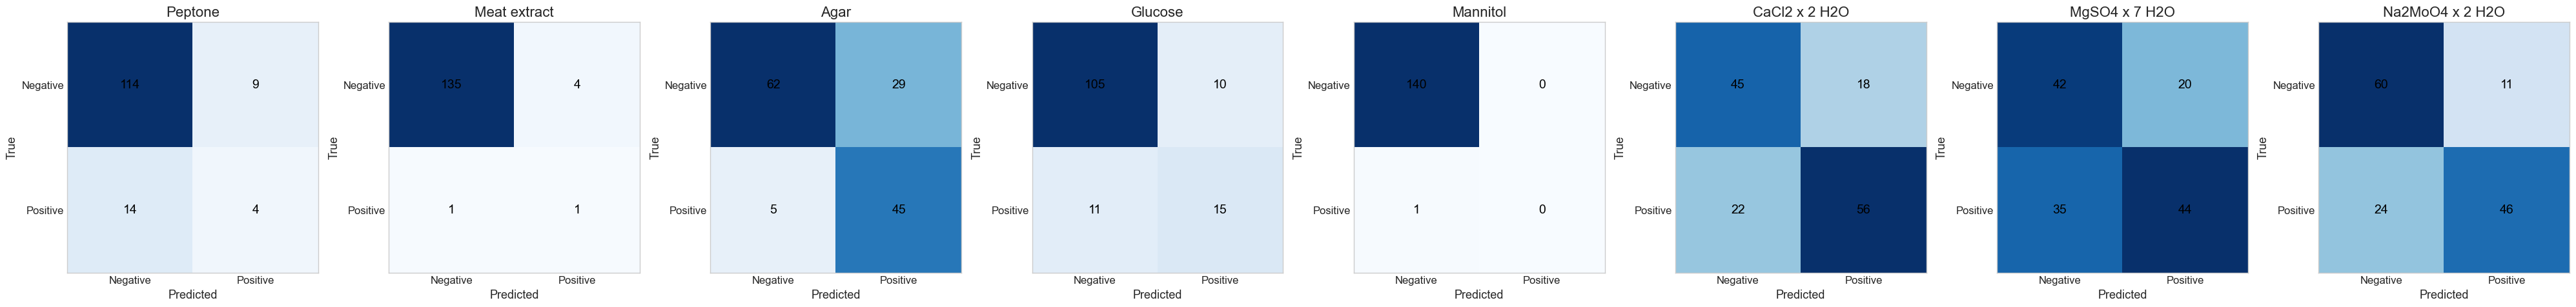

In [55]:
mlf.plot_multilabel_confusion_matrix(
    y_true=y_test,
    y_pred=y_pred,
    labels=['Peptone','Meat extract','Agar','Glucose','Mannitol','CaCl2 x 2 H2O','MgSO4 x 7 H2O','Na2MoO4 x 2 H2O'],
)

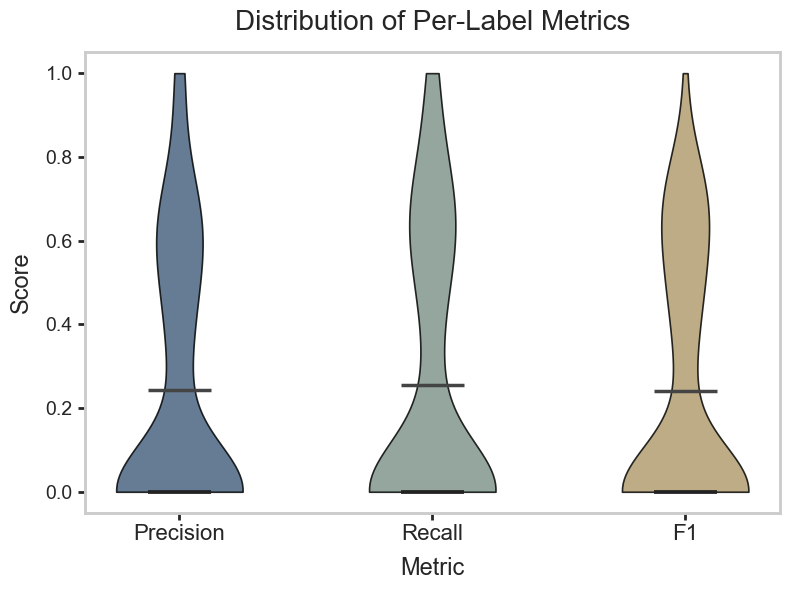

Precision  Mean: 0.244  |  Median: 0.000
Recall  Mean: 0.255  |  Median: 0.000
F1  Mean: 0.241  |  Median: 0.000


{'precision': array([0.30769231, 0.2       , 0.60810811, 0.6       , 0.        ,
        0.75675676, 0.6875    , 0.80701754, 0.41935484, 0.625     ,
        0.62      , 0.        , 0.34375   , 0.80898876, 0.62      ,
        0.        , 0.5       , 0.        , 0.375     , 0.        ,
        0.66666667, 0.        , 0.5       , 0.66666667, 0.59574468,
        0.59615385, 0.86792453, 0.66666667, 0.57575758, 0.76470588,
        0.7254902 , 0.83116883, 0.        , 0.66666667, 0.5952381 ,
        0.65853659, 0.51162791, 0.51162791, 1.        , 0.        ,
        0.49019608, 0.        , 0.56666667, 0.44444444, 0.45      ,
        0.375     , 0.        , 1.        , 0.        , 0.125     ,
        0.55932203, 0.25      , 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.6       , 0.        , 0.625     , 0.        ,
        0.        , 0.        , 1.        , 0.5       , 0.42857143,
        0.        , 0.        , 0.6

In [56]:
mlf.plot_violin_label_metrics(
    y_test, y_pred,
    figsize=(8,6),
    fontsize=16,
)

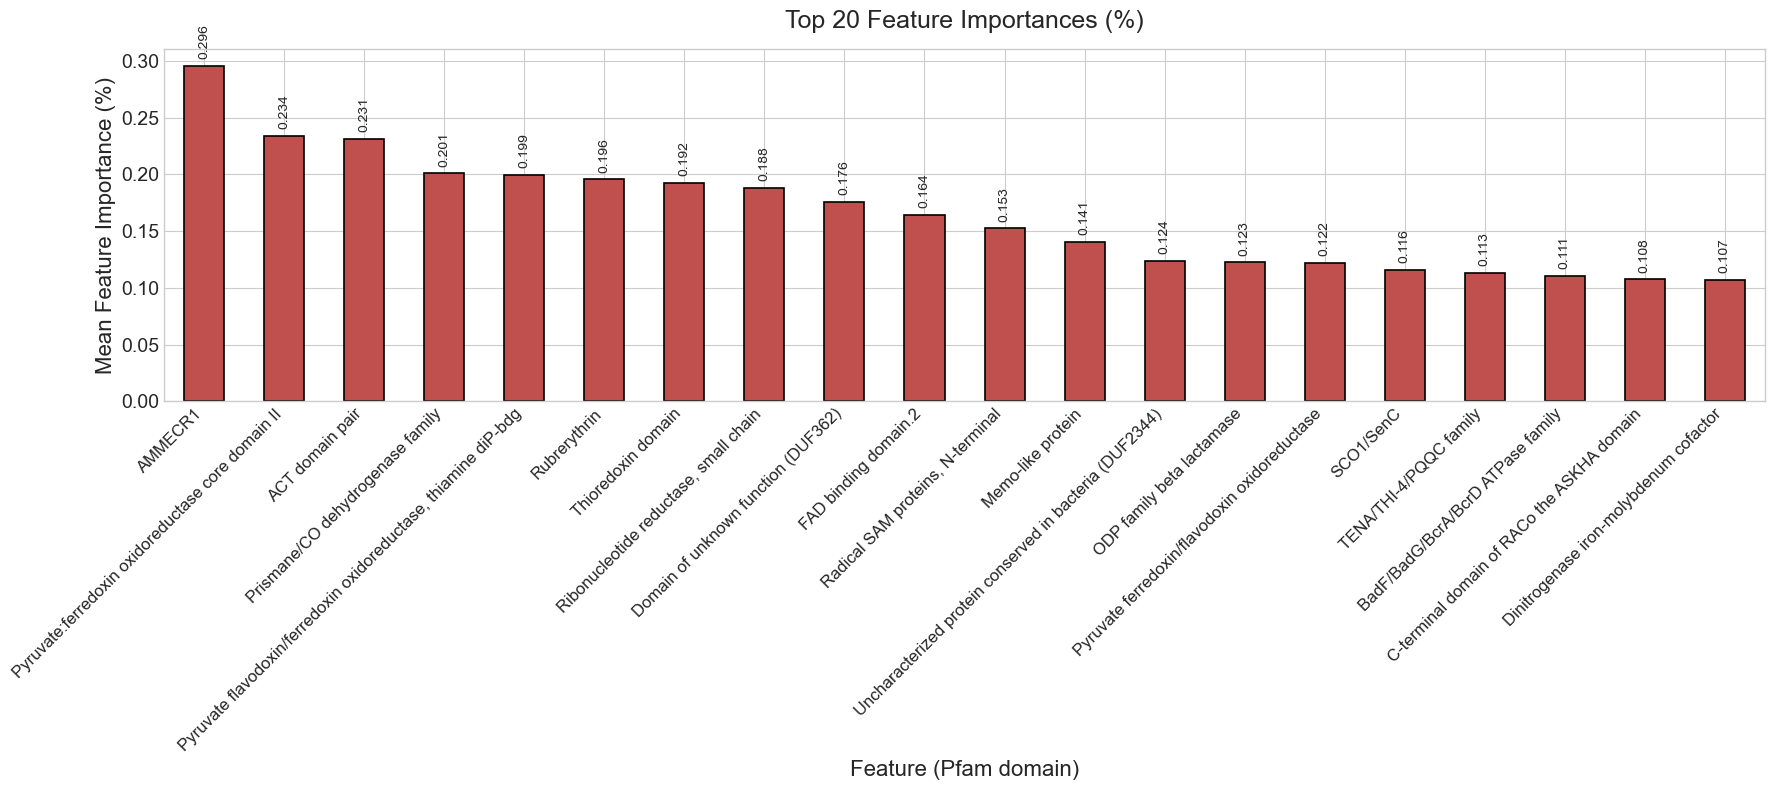

=== Top Feature Importances (%) ===
AMMECR1                                                            0.30
Pyruvate:ferredoxin oxidoreductase core domain II                  0.23
ACT domain pair                                                    0.23
Prismane/CO dehydrogenase family                                   0.20
Pyruvate flavodoxin/ferredoxin oxidoreductase, thiamine diP-bdg    0.20
Rubrerythrin                                                       0.20
Thioredoxin domain                                                 0.19
Ribonucleotide reductase, small chain                              0.19
Domain of unknown function (DUF362)                                0.18
FAD binding domain.2                                               0.16
Radical SAM proteins, N-terminal                                   0.15
Memo-like protein                                                  0.14
Uncharacterized protein conserved in bacteria (DUF2344)            0.12
ODP family beta lactamase   

In [58]:
importances = mlf.plot_feature_importance_pct(
    clf,
    feature_names=pfam_df_filtered.columns,
    top_n=20,
    figsize=(18,8),
    dpi=600
)

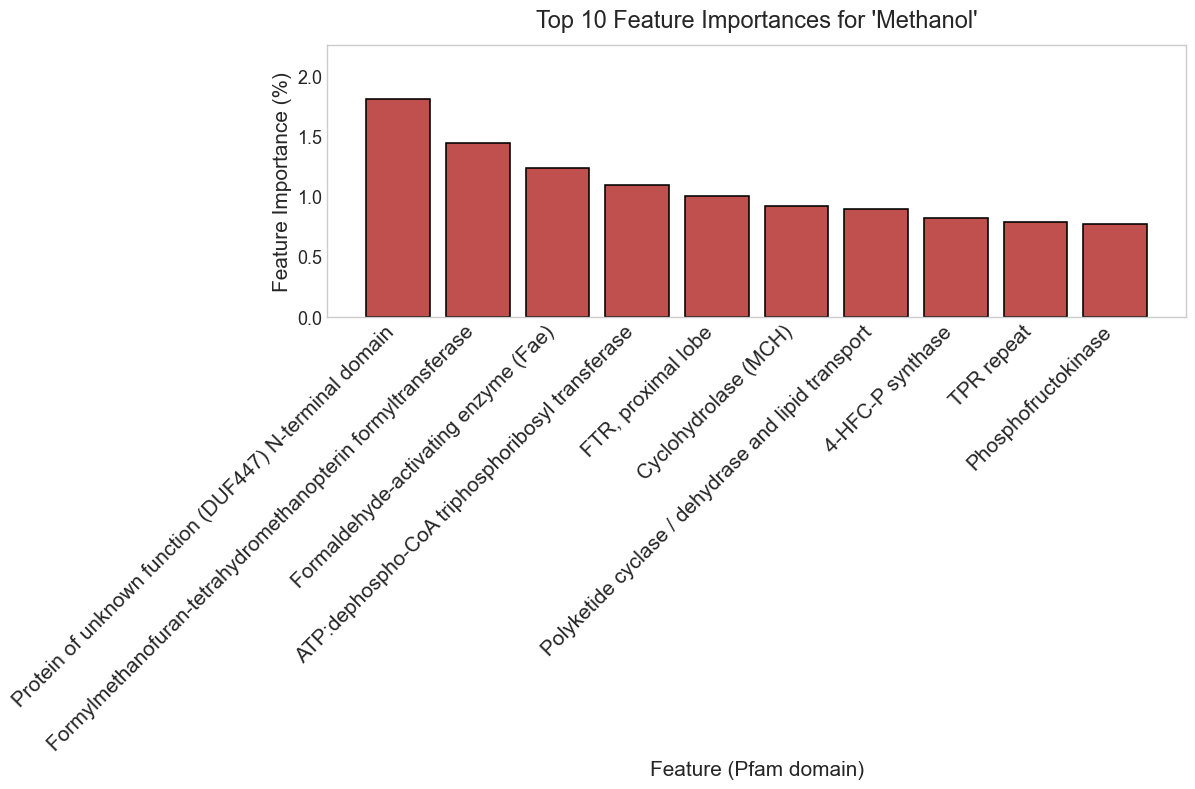

=== Top Features for 'Methanol' (as %) ===
Protein of unknown function (DUF447) N-terminal domain         1.80
Formylmethanofuran-tetrahydromethanopterin formyltransferase   1.44
Formaldehyde-activating enzyme (Fae)                           1.23
ATP:dephospho-CoA triphosphoribosyl transferase                1.09
FTR, proximal lobe                                             1.00
Cyclohydrolase (MCH)                                           0.91
Polyketide cyclase / dehydrase and lipid transport             0.89
4-HFC-P synthase                                               0.82
TPR repeat                                                     0.78
Phosphofructokinase                                            0.76


Protein of unknown function (DUF447) N-terminal domain          1.802514
Formylmethanofuran-tetrahydromethanopterin formyltransferase    1.440827
Formaldehyde-activating enzyme (Fae)                            1.231440
ATP:dephospho-CoA triphosphoribosyl transferase                 1.091771
FTR, proximal lobe                                              0.997020
Cyclohydrolase (MCH)                                            0.914642
Polyketide cyclase / dehydrase and lipid transport              0.889026
4-HFC-P synthase                                                0.816078
TPR repeat                                                      0.782498
Phosphofructokinase                                             0.764829
dtype: float64

In [62]:
mlf.plot_feature_importance_for_label(
    clf=clf,                                 # Your fitted MultiOutputClassifier
    feature_names=pfam_df_filtered.columns,           # Features (Pfam names)
    label_names=media_df_filtered.columns,            # Output label names (ingredient names)
    target_label='Methanol',                  # The ingredient/label of interest
    top_n=10
)

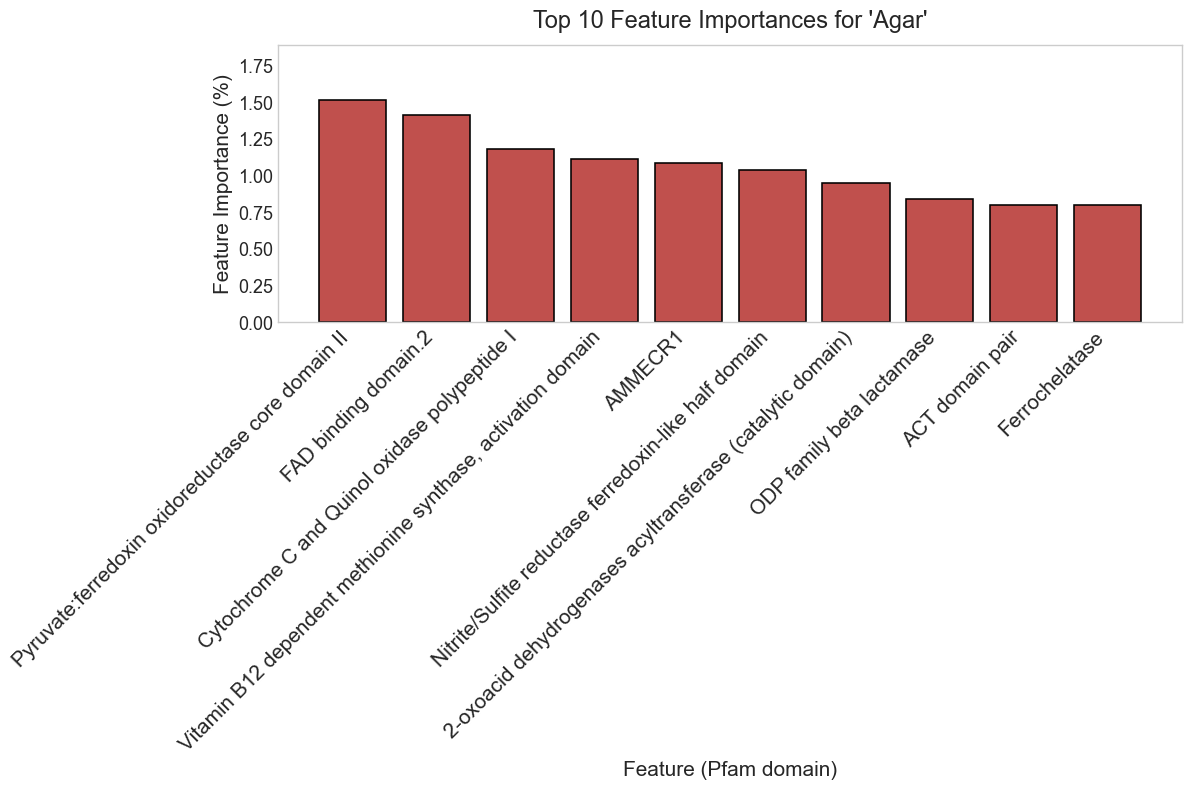

=== Top Features for 'Agar' (as %) ===
Pyruvate:ferredoxin oxidoreductase core domain II              1.51
FAD binding domain.2                                           1.41
Cytochrome C and Quinol oxidase polypeptide I                  1.18
Vitamin B12 dependent methionine synthase, activation domain   1.11
AMMECR1                                                        1.08
Nitrite/Sulfite reductase ferredoxin-like half domain          1.03
2-oxoacid dehydrogenases acyltransferase (catalytic domain)    0.95
ODP family beta lactamase                                      0.84
ACT domain pair                                                0.80
Ferrochelatase                                                 0.80


Pyruvate:ferredoxin oxidoreductase core domain II               1.509000
FAD binding domain.2                                            1.410335
Cytochrome C and Quinol oxidase polypeptide I                   1.177512
Vitamin B12 dependent methionine synthase, activation domain    1.109524
AMMECR1                                                         1.082531
Nitrite/Sulfite reductase ferredoxin-like half domain           1.031276
2-oxoacid dehydrogenases acyltransferase (catalytic domain)     0.945028
ODP family beta lactamase                                       0.835795
ACT domain pair                                                 0.799206
Ferrochelatase                                                  0.797979
dtype: float64

In [63]:
mlf.plot_feature_importance_for_label(
    clf=clf,                                 # Your fitted MultiOutputClassifier
    feature_names=pfam_df_filtered.columns,           # Features (Pfam names)
    label_names=media_df_filtered.columns,            # Output label names (ingredient names)
    target_label='Agar',                  # The ingredient/label of interest
    top_n=10
)

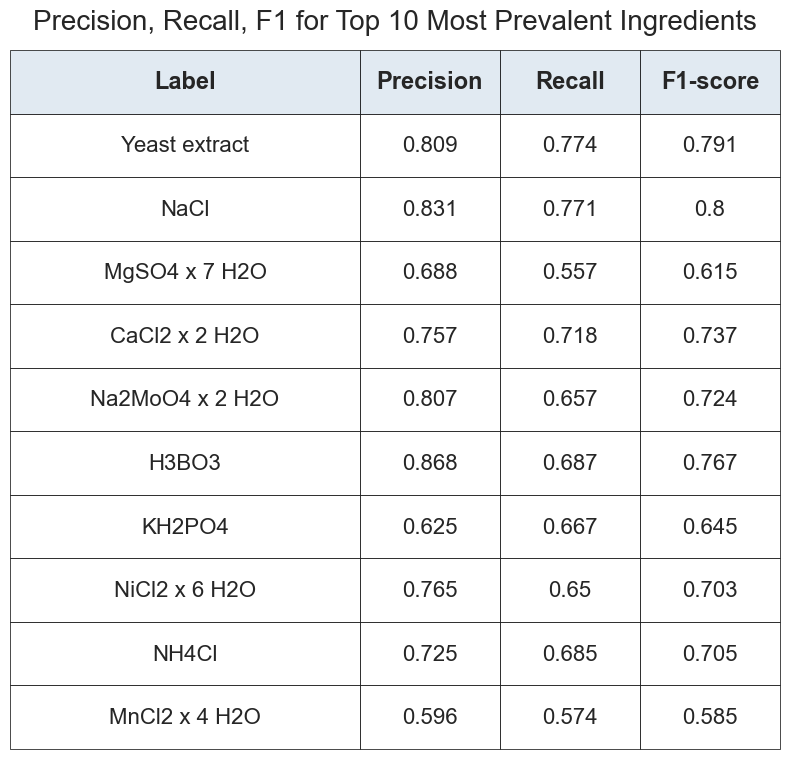

,Label,Precision,Recall,F1-score
0,Yeast extract,0.809,0.774,0.791
1,NaCl,0.831,0.771,0.800
2,MgSO4 x 7 H2O,0.688,0.557,0.615
3,CaCl2 x 2 H2O,0.757,0.718,0.737
4,Na2MoO4 x 2 H2O,0.807,0.657,0.724
5,H3BO3,0.868,0.687,0.767
6,KH2PO4,0.625,0.667,0.645
7,NiCl2 x 6 H2O,0.765,0.650,0.703
8,NH4Cl,0.725,0.685,0.705
9,MnCl2 x 4 H2O,0.596,0.574,0.585


In [64]:
mlf.table_figure_label_metrics(
    y_true=y_test,
    y_pred=y_pred,
    label_names=media_df_filtered.columns,
    top_n=10,
)

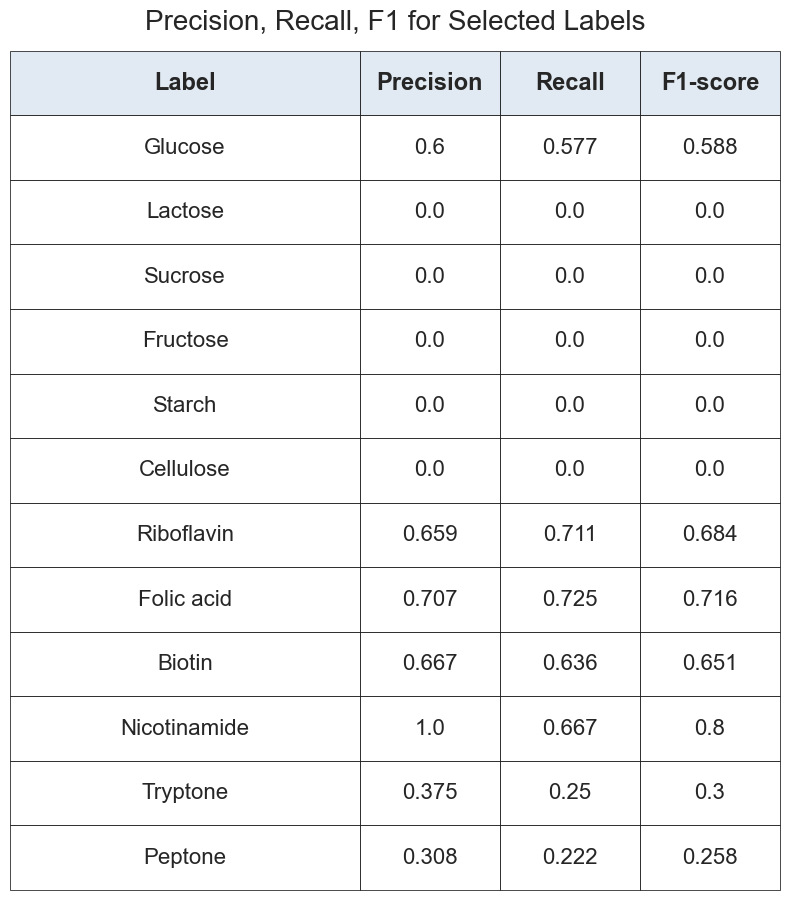

,Label,Precision,Recall,F1-score
0,Glucose,0.600,0.577,0.588
1,Lactose,0.000,0.000,0.000
2,Sucrose,0.000,0.000,0.000
3,Fructose,0.000,0.000,0.000
4,Starch,0.000,0.000,0.000
5,Cellulose,0.000,0.000,0.000
6,Riboflavin,0.659,0.711,0.684
7,Folic acid,0.707,0.725,0.716
8,Biotin,0.667,0.636,0.651
9,Nicotinamide,1.000,0.667,0.800


In [66]:
mlf.table_figure_label_metrics(
    y_true=y_test,
    y_pred=y_pred,
    label_names=media_df_filtered.columns,
    labels=[
        'Glucose', 'Lactose', 'Sucrose', 'Fructose', 'Starch', 'Cellulose',
        'Riboflavin', 'Folic acid', 'Pyridoxine', 'Biotin', 'Nicotinamide',
        'Tryptone', 'Peptone','Mannose'
    ],
)

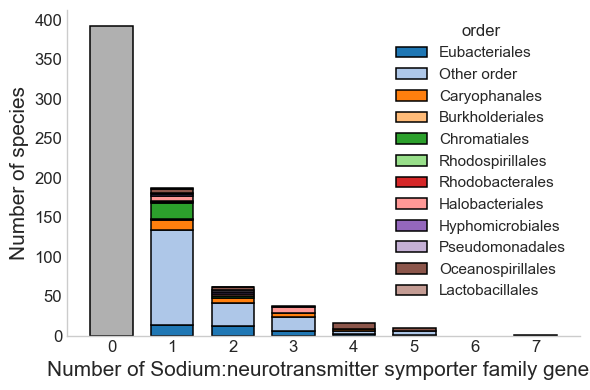

In [68]:
tax_dict = {int(k): v for k, v in 
            mlf.read_json('/Users/liangxuntan/Code/fyp2025/data/modelbuildingdata/num2order.json').items()}

mlf.plot_feature_histogram_by_taxonomy(feature_df=pfam_df, 
                                       features=['Sodium:neurotransmitter symporter family'],
                                       tax_dict=tax_dict,
                                       count_threshold=12,
                                       taxonomy_label='order')